# **Determining cardinality in categorical variables**

Cardinality refers to the number of unique categories in each variable. Thus, the cardinality of the variable gender, which takes the values 'male' and 'female' is 2, whereas the cardinality of the variable civil status, which takes values 'married', 'divorced', 'single' and 'widow' is 4.

In this recipe, we will quantify and visualize the cardinality of categorical variables, utilizing the dataset from the [KDD-CUP-98](https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data) available in the UCI Machine Learning Repository.

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

====================================================================================================

To download the data, visit this [website](https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/)

Click the 'cup98lrn.zip' to begin the download. Unzip the file and save 'cup98LRN.txt' to the parent directory of this repo (../cup98LRN.txt).

====================================================================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# we will use the selected variables for the recipe
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']

# load the dataset
data = pd.read_csv('cup98LRN.txt', usecols=cols)

# the dataset contains empty strings
# which are in essence missing values
# I replace those here
data = data.replace(' ', np.nan)

# let's inspect the first 5 rows
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [4]:
# with the following command we can learn the cardinality
# of each of the loaded variables

data.nunique()

DOMAIN      16
GENDER       5
RFA_2       14
RFA_15      31
MDMAUD_A     3
dtype: int64

In [5]:
# nunique() ignores missing data by default. If we want
# to consider missing values as an additional category
# we need to explicitly mention so, passing the argument
# dropna=False

data.nunique(dropna=False)

DOMAIN      17
GENDER       6
RFA_2       14
RFA_15      32
MDMAUD_A     4
dtype: int64

In [6]:
# let's print the different unique labels
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J'], dtype=object)

Text(0.5, 1.0, 'Cardinality')

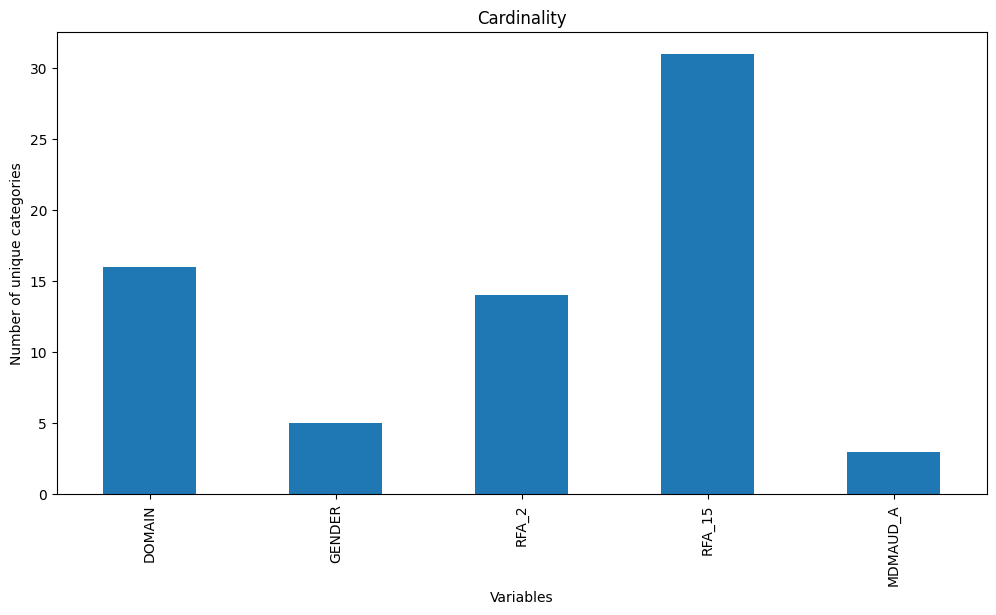

In [7]:
# let's plot the cardinality of the variables

data.nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [8]:
# if we want to evaluate the cardinality of only a subset
# of columns from a data set, we can do so by passing the
# columns of interest as follows:

# evaluate cardinality of variables of choice
data[['RFA_2', 'MDMAUD_A', 'RFA_2']].nunique()

RFA_2       14
MDMAUD_A     3
RFA_2       14
dtype: int64